In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1102]:
df = pd.read_csv("surat_uncleaned.csv")
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [1104]:
df.describe()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
count,4525,4525,4525,4421,4524,4480,4185,3936,3154,4157,4525
unique,1992,6,1399,38,138,222,78,176,2588,2134,841
top,3 BHK Apartment for Sale in Vesu Surat,Super Area,1000 sqft,Resale,Ready to Move,Resale,Unfurnished,East,Multistorey apartment is available for sale. I...,"₹5,000 per sqft",Call for Price
freq,93,2599,77,2197,3078,431,2322,1487,35,64,173


In [1105]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction', 'status',
       'floor', 'furnishing', 'facing', 'description', 'price_per_sqft',
       'price'],
      dtype='object')

In [1106]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [1107]:
df.square_feet.unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], shape=(1399,), dtype=object)

In [1108]:
df['square_feet']=df['square_feet'].str.replace(r'\W+','', regex=True)
df['square_feet']=df['square_feet'].str.replace(r'\D+','', regex=True)
df['square_feet']=df['square_feet'].str.split().str[0].astype(float)

In [1109]:
df.square_feet.unique()

array([ 644., 1278., 1173., ..., 2545., 5175., 2620.], shape=(1346,))

In [1110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   areaWithType    4525 non-null   object 
 2   square_feet     4519 non-null   float64
 3   transaction     4421 non-null   object 
 4   status          4524 non-null   object 
 5   floor           4480 non-null   object 
 6   furnishing      4185 non-null   object 
 7   facing          3936 non-null   object 
 8   description     3154 non-null   object 
 9   price_per_sqft  4157 non-null   object 
 10  price           4525 non-null   object 
dtypes: float64(1), object(10)
memory usage: 389.0+ KB


In [1111]:
df.price.unique()

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [1112]:
df['price']=df['price'].str.replace(r'\W+','', regex=True)
df['price']=df['price'].str.replace(r'\D+','', regex=True)
df['price']=df['price'].str.split().str[0].astype(float)

In [1113]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
status             object
floor              object
furnishing         object
facing             object
description        object
price_per_sqft     object
price             float64
dtype: object

In [1114]:
df.price_per_sqft.unique()

array(['₹2,891 per sqft ', '₹3,551 per sqft ', '₹3,800 per sqft ', ...,
       '₹8,512 per sqft ', '₹8,200 per sqft ', '₹5,756 per sqft '],
      shape=(2135,), dtype=object)

In [1115]:
df['price_per_sqft']=df['price_per_sqft'].str.replace(r'\W+','', regex=True)
df['price_per_sqft']=df['price_per_sqft'].str.replace(r'\D+','', regex=True)
df['price_per_sqft']=df['price_per_sqft'].str.split().str[0].astype(float)

In [1116]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
status             object
floor              object
furnishing         object
facing             object
description        object
price_per_sqft    float64
price             float64
dtype: object

In [1117]:
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...",2891.0,338.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,3551.0,454.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,3800.0,446.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,3966.0,47.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...",3600.0,45.0


In [1118]:
df['property_name'].unique()

array(['2 BHK Apartment for Sale in Dindoli Surat',
       '2 BHK Apartment for Sale in Althan Surat',
       '2 BHK Apartment for Sale in Pal Gam Surat', ...,
       '5 BHK Apartment for Sale in Sangini Arise, Bharthana Surat',
       '5 BHK Apartment for Sale in D and M Elysium Avenue, Piplod Surat',
       '6 BHK Apartment for Sale in Millionaires Lifestyle, Vesu Surat'],
      shape=(1992,), dtype=object)

In [1119]:
df['BHK']=df['property_name'].str.extract(r'(\d+)').astype(float)


In [1120]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [1121]:
df['num_of_floor']=df['floor'].str.extract(r'(\d+)').astype(float)
df['total_floor']=df['floor'].str.extract(r'\s(\d+)').astype(float)

In [1122]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
status             object
floor              object
furnishing         object
facing             object
description        object
price_per_sqft    float64
price             float64
BHK               float64
num_of_floor      float64
total_floor       float64
dtype: object

In [1123]:
df['furnishing'].dropna(inplace=True)
df['facing'].dropna(inplace=True)

In [1124]:
df.drop(columns=['areaWithType', 'description'], inplace=True, errors='ignore')

In [1125]:
df['price_per_sqft'].isnull().sum()

np.int64(368)

In [1126]:
missing_price = df['price_per_sqft'].isnull()
df.loc[missing_price,'price_per_sqft'] = (df.loc[missing_price,'price'] / df.loc[missing_price,'square_feet'])
df['price_per_sqft'] = df['price_per_sqft'].round(2)

In [1127]:
df['price_per_sqft'].isnull().sum()

np.int64(179)

In [1128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   square_feet     4519 non-null   float64
 2   transaction     4421 non-null   object 
 3   status          4524 non-null   object 
 4   floor           4480 non-null   object 
 5   furnishing      4185 non-null   object 
 6   facing          3936 non-null   object 
 7   price_per_sqft  4346 non-null   float64
 8   price           4352 non-null   float64
 9   BHK             3896 non-null   float64
 10  num_of_floor    3686 non-null   float64
 11  total_floor     3645 non-null   float64
dtypes: float64(6), object(6)
memory usage: 424.3+ KB


In [1129]:
for i in ['transaction', 'status', 'floor']:
    df[i].fillna(df[i].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_21212\2115715614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [1130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   square_feet     4519 non-null   float64
 2   transaction     4525 non-null   object 
 3   status          4525 non-null   object 
 4   floor           4525 non-null   object 
 5   furnishing      4185 non-null   object 
 6   facing          3936 non-null   object 
 7   price_per_sqft  4346 non-null   float64
 8   price           4352 non-null   float64
 9   BHK             3896 non-null   float64
 10  num_of_floor    3686 non-null   float64
 11  total_floor     3645 non-null   float64
dtypes: float64(6), object(6)
memory usage: 424.3+ KB


In [1131]:
for i in ['square_feet', 'price', 'price_per_sqft', 'num_of_floor', 'total_floor', 'BHK']:
    df[i].fillna(df[i].median(), inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_21212\1994902445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_21212\1994902445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [1132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   square_feet     4525 non-null   float64
 2   transaction     4525 non-null   object 
 3   status          4525 non-null   object 
 4   floor           4525 non-null   object 
 5   furnishing      4185 non-null   object 
 6   facing          3936 non-null   object 
 7   price_per_sqft  4525 non-null   float64
 8   price           4525 non-null   float64
 9   BHK             4525 non-null   float64
 10  num_of_floor    4525 non-null   float64
 11  total_floor     4525 non-null   float64
dtypes: float64(6), object(6)
memory usage: 424.3+ KB


In [1133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4525 non-null   object 
 1   square_feet     4525 non-null   float64
 2   transaction     4525 non-null   object 
 3   status          4525 non-null   object 
 4   floor           4525 non-null   object 
 5   furnishing      4185 non-null   object 
 6   facing          3936 non-null   object 
 7   price_per_sqft  4525 non-null   float64
 8   price           4525 non-null   float64
 9   BHK             4525 non-null   float64
 10  num_of_floor    4525 non-null   float64
 11  total_floor     4525 non-null   float64
dtypes: float64(6), object(6)
memory usage: 424.3+ KB


In [1135]:
def iqr_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL,UL

In [1136]:
l,u=iqr_outlier("price")
print(l,u)

-233.5 522.5


In [1137]:
df = df[df['price'].between(l,u)]

In [1138]:
l,u=iqr_outlier("square_feet")
print(l,u)

-1176.0 3960.0


In [1139]:
df = df[df['square_feet'].between(l,u)]

In [1140]:
l,u=iqr_outlier("price_per_sqft")
print(l,u)

-323.125 9793.875


In [1141]:
df = df[df['price_per_sqft'].between(l,u)]

<Axes: >

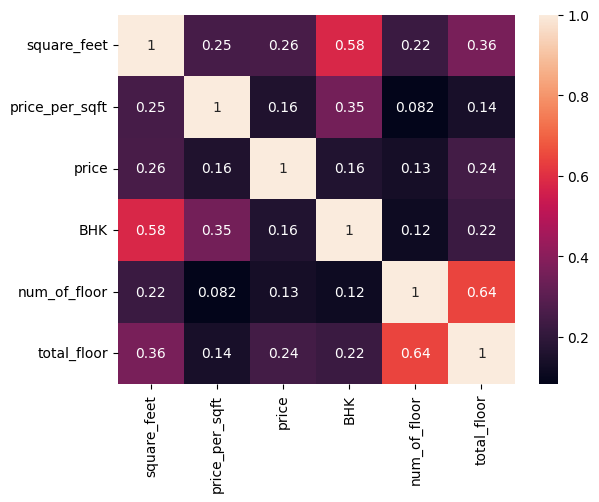

In [1142]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [1143]:
label_columns = ['transaction', 'status', 'furnishing', 'facing', 'floor', 'property_name']
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le